# GRAFOS

In [19]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import sys
import queue
print ("- Diseñado en python 3")
print ("- No testeado para python 2")
print ("- Kernel en ejecución: \npython " + sys.version)

- Diseñado en python 3
- No testeado para python 2
- Kernel en ejecución: 
python 3.5.2 |Anaconda 4.2.0 (64-bit)| (default, Jul  2 2016, 17:53:06) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]


# Practica 3

## Apartado A - Grafo aleatorio

In [20]:
def grafo_aleatorio(num_nodos, prob):
    res = np.zeros(shape = (num_nodos, num_nodos))
    for i in range(num_nodos):
        for j in range(num_nodos):
            if i>j and i!=j and rd.random()<=prob:
                    res[i][j]=1
                    res[j][i]=1
    return res

res = grafo_aleatorio(6, 0.5)
print (res)

def tam_grafo(grafo):
    return np.shape(grafo)[0]

def aleatorio(num_nodos, prob):
    grafo_aleatorio(num_nodos, prob)

[[ 0.  0.  1.  1.  0.  1.]
 [ 0.  0.  1.  1.  1.  0.]
 [ 1.  1.  0.  0.  1.  1.]
 [ 1.  1.  0.  0.  1.  0.]
 [ 0.  1.  1.  1.  0.  1.]
 [ 1.  0.  1.  0.  1.  0.]]


#### Definimos un grafo aleatorio a reutilizar

In [21]:
grafo=grafo_aleatorio(5, 0.5)
print (grafo)

grafo2=grafo_aleatorio(80, 0.5)
print (grafo2)

grafo3=grafo_aleatorio(80, 0.02)
print (grafo3)

[[ 0.  0.  1.  1.  0.]
 [ 0.  0.  1.  1.  1.]
 [ 1.  1.  0.  0.  0.]
 [ 1.  1.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]]
[[ 0.  0.  0. ...,  0.  1.  1.]
 [ 0.  0.  0. ...,  0.  0.  1.]
 [ 0.  0.  0. ...,  1.  0.  1.]
 ..., 
 [ 0.  0.  1. ...,  0.  1.  0.]
 [ 1.  0.  0. ...,  1.  0.  1.]
 [ 1.  1.  1. ...,  0.  1.  0.]]
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


## Apartado B

In [22]:
def indiceCluster_caminoCar(grafo):
    c, grados, N = calcula_C(grafo)   
    l = calcula_L(grafo)
    return c, l, grados

def aleatiorio2(num_nodos, prob):
    c, l, grados = indiceCluster_caminoCar(grafo_aleatorio(num_nodos, prob))
    print ("Indice de clusterización (C) = " + str(c))
    print ("Camino característico (L) = " + str(l))
    print ("Distribución de los grados de los nodos:")
    plt.figure()
    dist = get_distro(grados, num_nodos)
    f = open('dist.txt', 'w')
    f.write(str(dist))
    #print(str(dist))
    plt.plot(dist)
    plt.show()
    return c, l, grados

### Indice de clusterización

In [23]:
def calcula_C(grafo):
    nodos=int(tam_grafo(grafo))
    grados = calcula_grados_rapido(grafo, nodos)
    N=[0 for i in range(nodos)]
    c = [0.0 for x in range(nodos)]
    suma = 0.0
    
    for i in range(nodos):
        for j in range(nodos):
            if grafo[i][j] == 1:
                for k in range(j, nodos):
                    if grafo[j][k] == 1 and grafo[i][k] == 1:
                        N[i] = N[i] + 1
                        
    for i in range(nodos):
        if grados[i] > 1:
            c[i] = (2*N[i]) / (grados[i] * (grados[i] - 1))
        suma = suma + c[i]
    
    return suma/nodos, grados, N

### Camino característico

In [24]:
def calcula_L(grafo):
    L=0
    for i in range (tam_grafo(grafo)):
        distancias, padres = busqueda_anchura(grafo, i)
        L = L + ( sum(distancias) / (tam_grafo(grafo)-1) )
    return L / tam_grafo(grafo)

### Más y auxiliar

In [28]:
def calcula_grados(grafo):
    grados=[0 for i in range(tam_grafo(grafo))]
    all_vecinos=[]
    for i in range (tam_grafo(grafo)):
        vecinos=[]
        for j in range (tam_grafo(grafo)):
            if grafo[i][j]==1:
                grados[i] = grados[i] + 1
                vecinos.append(j)   
        all_vecinos.append(vecinos)
    return grados, all_vecinos

def calcula_grados_rapido(grafo, limit):
    grados=[0 for i in range(limit)]
    for i in range (limit):
        grados[i]=sum(grafo[i])
    return grados

def adyacentes(grafo, vertice):
    vecinos=[]
    for j in range (tam_grafo(grafo)):
        if grafo[vertice][j]==1:
            vecinos.append(j) 
    return vecinos

def matrix_to_adyacent(grafo):
    g, v = calcula_grados(grafo)
    return v

def get_distro(grados, tam_grafo):
    res=[0 for i in range(tam_grafo)]
    for g in grados:
        res[int(g)]+=1
    return res
    
def busqueda_anchura(grafo, nodo_ini=0):
    visitado=[False for i in range(tam_grafo(grafo))]
    distancias=[float('inf') for i in range(tam_grafo(grafo))]
    padre=[None for i in range(tam_grafo(grafo))]

    visitado[nodo_ini]=True
    distancias[nodo_ini]=0
    
    cola = queue.Queue()
    cola.put(nodo_ini)
    
    while cola.empty()==False:
        u = cola.get()
        for v in adyacentes(grafo, u):
            if visitado[v]==False:
                distancias[v]=distancias[u]+1
                padre[v]=u
                cola.put(v)
                visitado[v]=True
    return distancias, padre

In [29]:
distancias, padres = busqueda_anchura(grafo)
print ("Distancias = " + str(distancias))
print ("Padres = " + str(padres))

Distancias = [0, 2, 1, 1, 3]
Padres = [None, 2, 0, 0, 1]


### Ejecución

Indice de clusterización (C) = 0.516093856242
Camino característico (L) = 1.487025316455696
Distribución de los grados de los nodos:


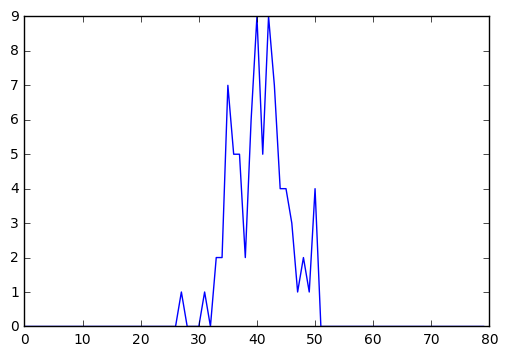

In [33]:
c, l, grados = indiceCluster_caminoCar(grafo2)
print ("Indice de clusterización (C) = " + str(c))
print ("Camino característico (L) = " + str(l))
print ("Distribución de los grados de los nodos:")
plt.figure()
dist = get_distro(grados, tam_grafo(grafo2))
f = open('dist.txt', 'w')
f.write(str(dist))
#print(str(dist))
plt.plot(dist)
plt.show()

## Apartado C

prob=0
Indice de clusterización (C) = 0.0
Camino característico (L) = inf
Distribución de los grados de los nodos:


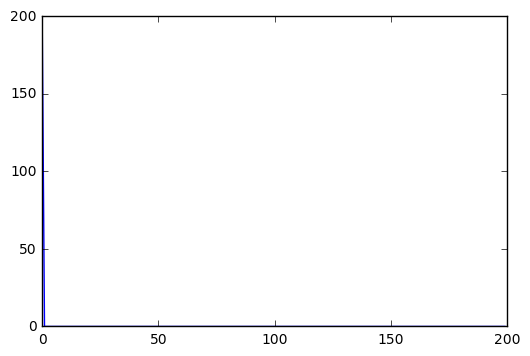

prob=0.0001
Indice de clusterización (C) = 0.0
Camino característico (L) = inf
Distribución de los grados de los nodos:


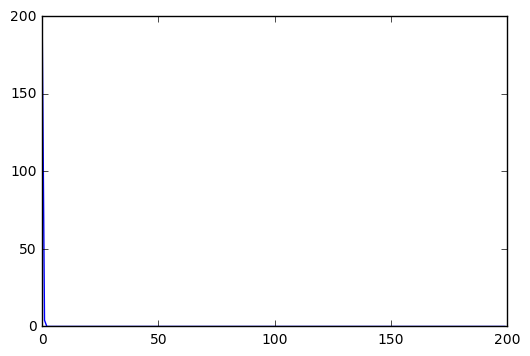

prob=0.0003
Indice de clusterización (C) = 0.0
Camino característico (L) = inf
Distribución de los grados de los nodos:


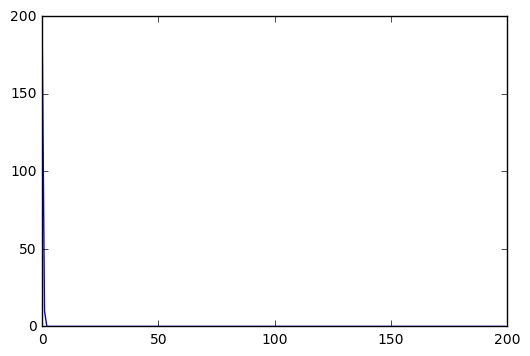

prob=0.0006
Indice de clusterización (C) = 0.0
Camino característico (L) = inf
Distribución de los grados de los nodos:


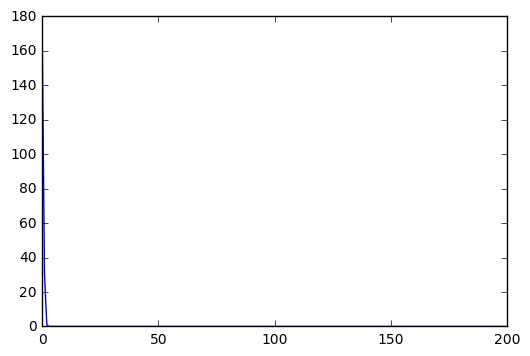

prob=0.001
Indice de clusterización (C) = 0.0
Camino característico (L) = inf
Distribución de los grados de los nodos:


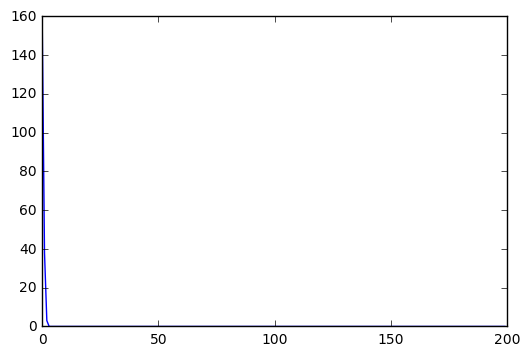

prob=0.003
Indice de clusterización (C) = 0.0
Camino característico (L) = inf
Distribución de los grados de los nodos:


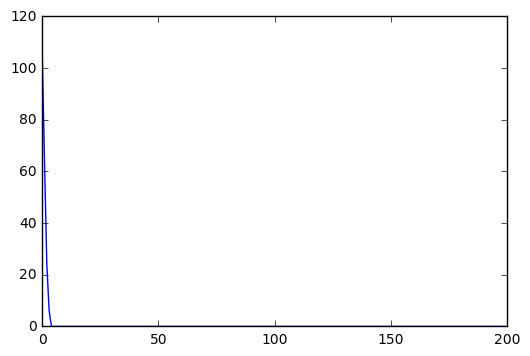

prob=0.006
Indice de clusterización (C) = 0.0
Camino característico (L) = inf
Distribución de los grados de los nodos:


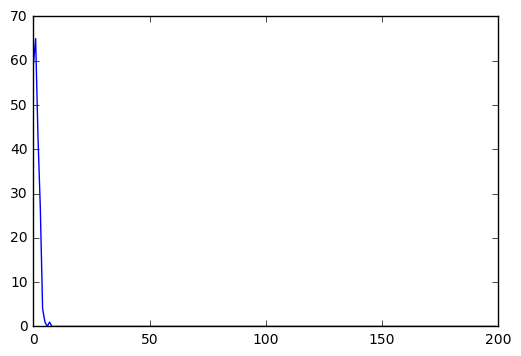

prob=0.01
Indice de clusterización (C) = 0.0
Camino característico (L) = inf
Distribución de los grados de los nodos:


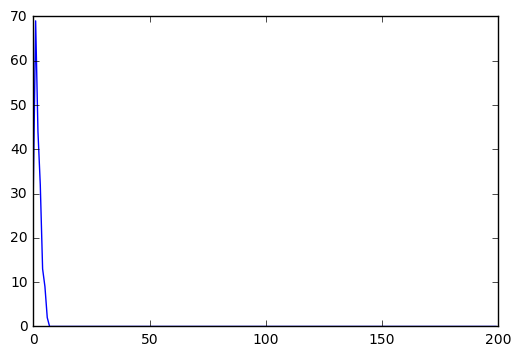

prob=0.03
Indice de clusterización (C) = 0.0264894549895
Camino característico (L) = 3.13145728643216
Distribución de los grados de los nodos:


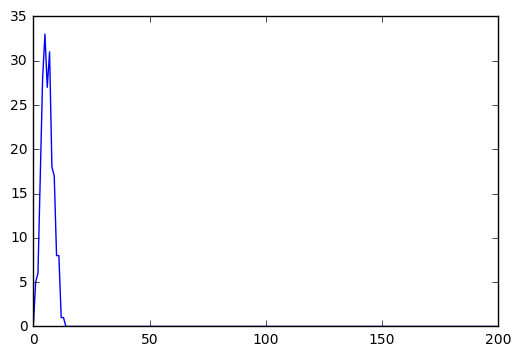

prob=0.06
Indice de clusterización (C) = 0.0598170182781
Camino característico (L) = 2.4122613065326637
Distribución de los grados de los nodos:


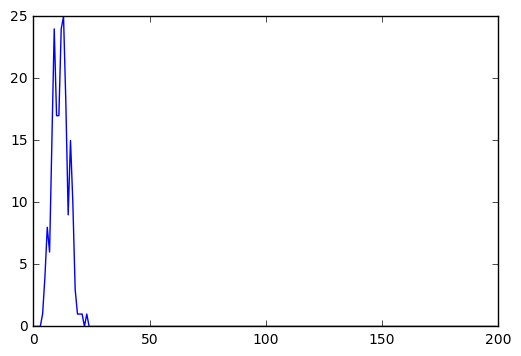

prob=0.1
Indice de clusterización (C) = 0.100489938528
Camino característico (L) = 2.0163316582914574
Distribución de los grados de los nodos:


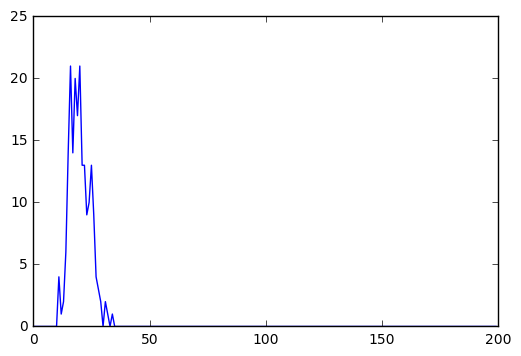

prob=0.3
Indice de clusterización (C) = 0.303094380008
Camino característico (L) = 1.6981407035175884
Distribución de los grados de los nodos:


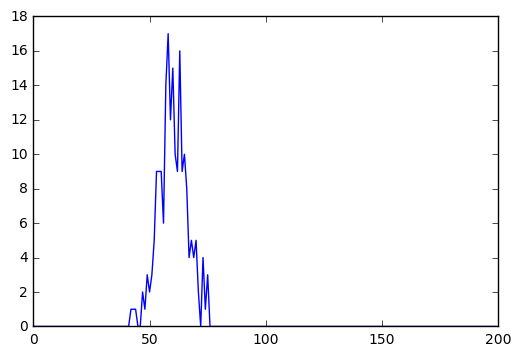

prob=0.6
Indice de clusterización (C) = 0.600606255321
Camino característico (L) = 1.3998492462311554
Distribución de los grados de los nodos:


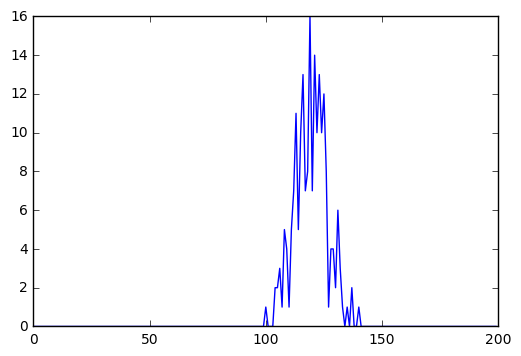

prob=1.0
Indice de clusterización (C) = 1.0
Camino característico (L) = 1.0
Distribución de los grados de los nodos:


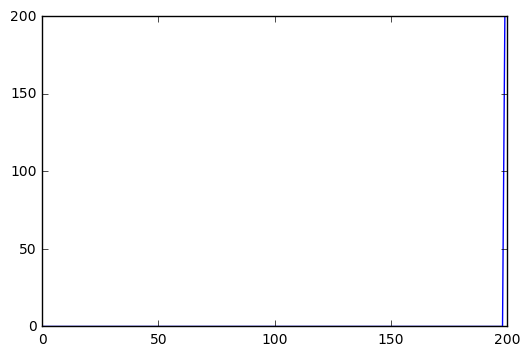

C y L


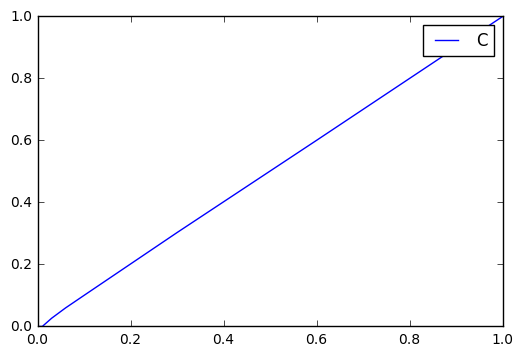

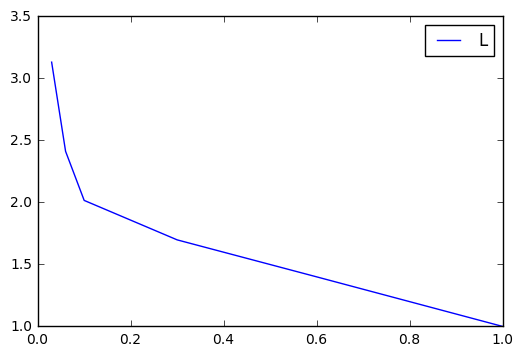

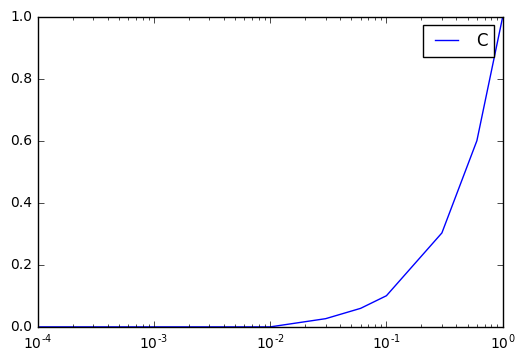

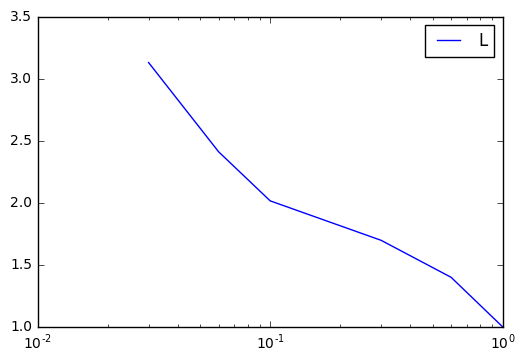

In [34]:
N=200
prob=[0,0.0001,0.0003,0.0006,0.001,0.003,0.006,0.01,0.03,0.06,0.1,0.3,0.6,1.]
cs=[]
ls=[]
for p in prob:
    print("==========================\nprob="+str(p))
    c, l, g = aleatiorio2(N, p)
    cs.append(c)
    ls.append(l)
print("==========================\nC y L")
plt.plot(prob, cs, label="C")
plt.legend()
plt.show()
plt.plot(prob, ls, label="L")
plt.legend()
plt.show()
plt.plot(prob, cs, label="C")
plt.legend()
plt.semilogx()
plt.show()
plt.plot(prob, ls, label="L")
plt.legend()
plt.semilogx()
plt.show()

prob=0
Indice de clusterización (C) = 0.0
Camino característico (L) = inf
Distribución de los grados de los nodos:


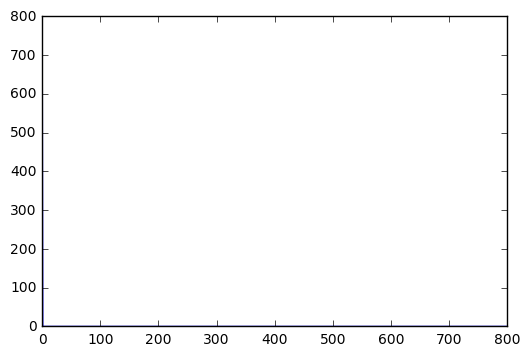

prob=0.0001
Indice de clusterización (C) = 0.0
Camino característico (L) = inf
Distribución de los grados de los nodos:


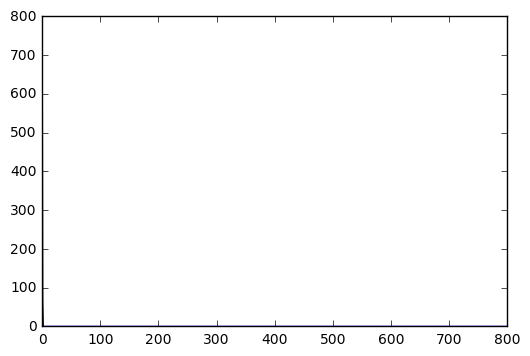

prob=0.0003
Indice de clusterización (C) = 0.0
Camino característico (L) = inf
Distribución de los grados de los nodos:


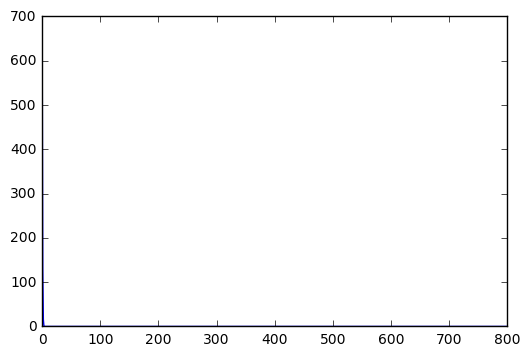

prob=0.0006
Indice de clusterización (C) = 0.0
Camino característico (L) = inf
Distribución de los grados de los nodos:


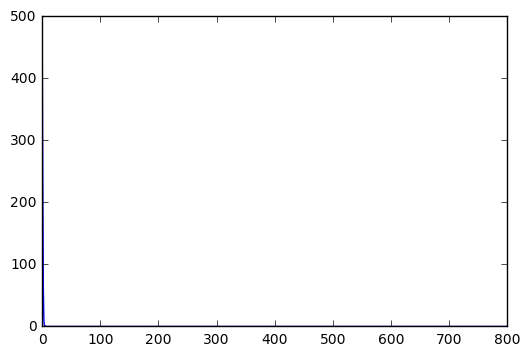

prob=0.001
Indice de clusterización (C) = 0.00291666666667
Camino característico (L) = inf
Distribución de los grados de los nodos:


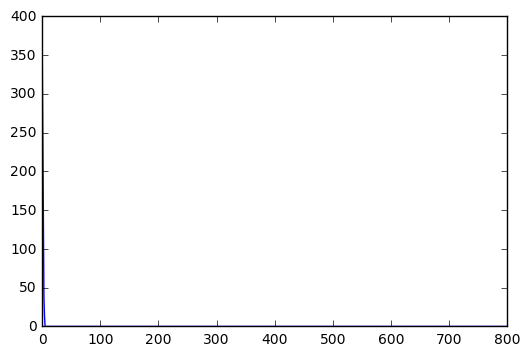

prob=0.003
Indice de clusterización (C) = 0.0
Camino característico (L) = inf
Distribución de los grados de los nodos:


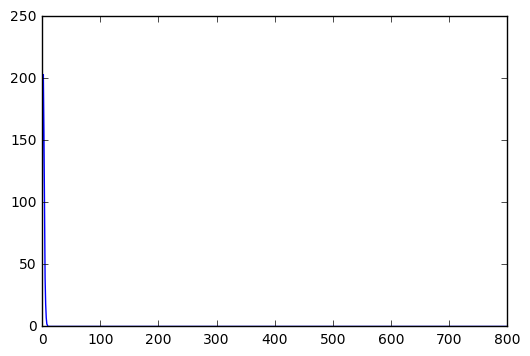

prob=0.006
Indice de clusterización (C) = 0.00587316849817
Camino característico (L) = inf
Distribución de los grados de los nodos:


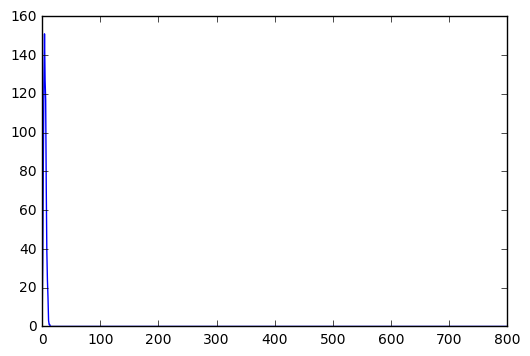

prob=0.01
Indice de clusterización (C) = 0.0110625242813
Camino característico (L) = inf
Distribución de los grados de los nodos:


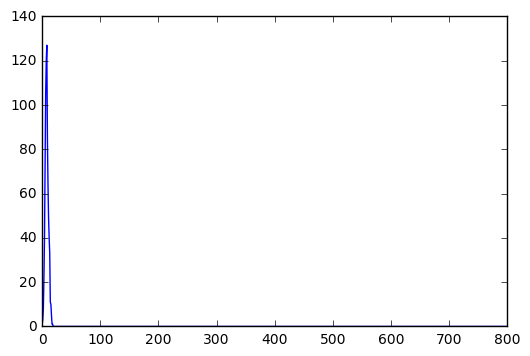

prob=0.03
Indice de clusterización (C) = 0.029431362547
Camino característico (L) = 2.4500438047559436
Distribución de los grados de los nodos:


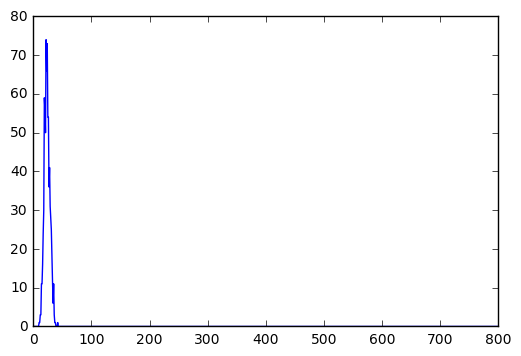

prob=0.06
Indice de clusterización (C) = 0.0598398788275
Camino característico (L) = 1.9938642052565732
Distribución de los grados de los nodos:


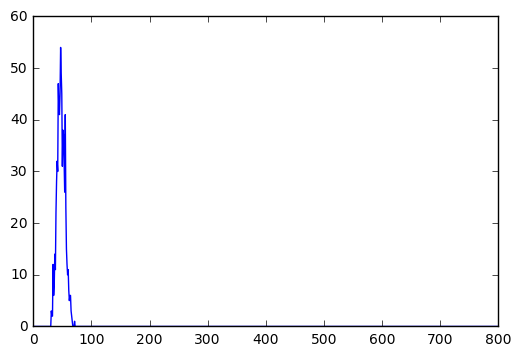

prob=0.1
Indice de clusterización (C) = 0.0996047612218
Camino característico (L) = 1.9007571964956191
Distribución de los grados de los nodos:


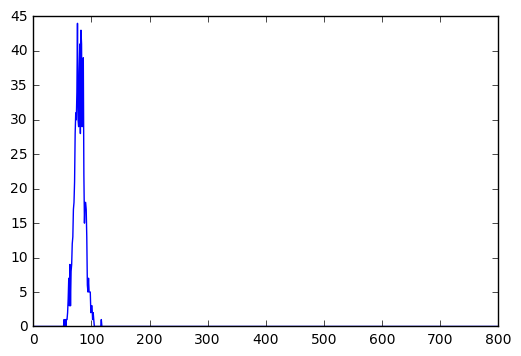

prob=0.3
Indice de clusterización (C) = 0.300067600264
Camino característico (L) = 1.6999874843554448
Distribución de los grados de los nodos:


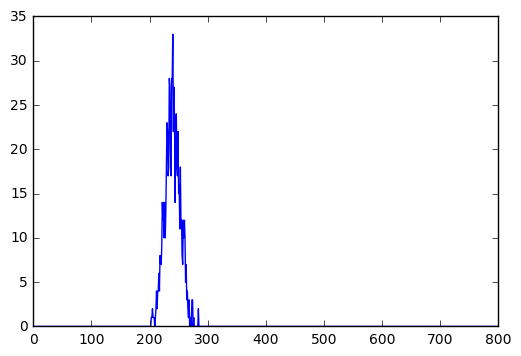

prob=0.6
Indice de clusterización (C) = 0.600617330558
Camino característico (L) = 1.3993335419274096
Distribución de los grados de los nodos:


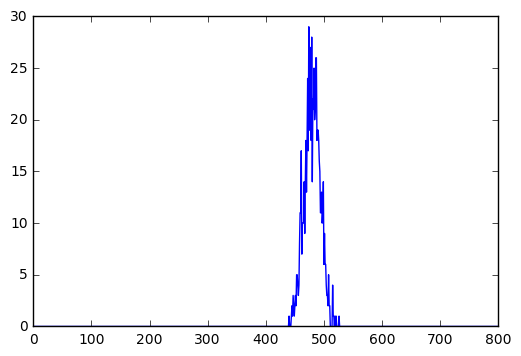

prob=1.0
Indice de clusterización (C) = 1.0
Camino característico (L) = 1.0
Distribución de los grados de los nodos:


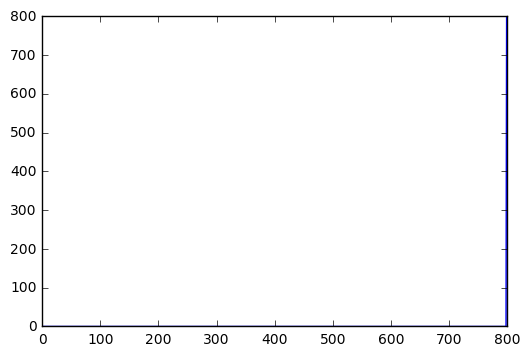

C y L


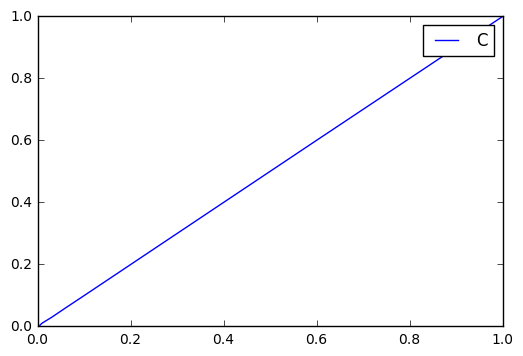

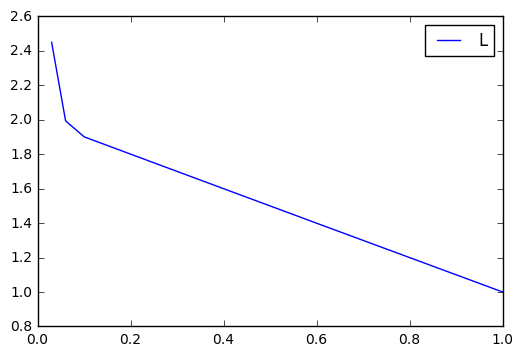

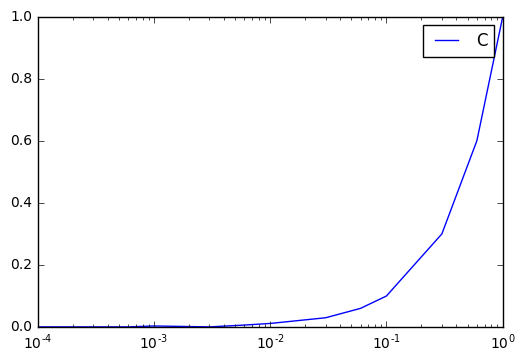

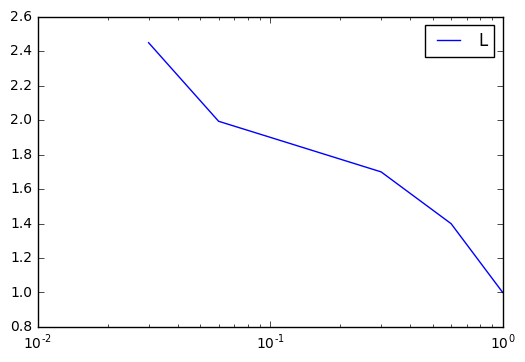

In [35]:
N=800
prob=[0,0.0001,0.0003,0.0006,0.001,0.003,0.006,0.01,0.03,0.06,0.1,0.3,0.6,1.]
cs=[]
ls=[]
for p in prob:
    print("==========================\nprob="+str(p))
    c, l, g = aleatiorio2(N, p)
    cs.append(c)
    ls.append(l)
print("==========================\nC y L")
plt.plot(prob, cs, label="C")
plt.legend()
plt.show()
plt.plot(prob, ls, label="L")
plt.legend()
plt.show()
plt.plot(prob, cs, label="C")
plt.legend()
plt.semilogx()
plt.show()
plt.plot(prob, ls, label="L")
plt.legend()
plt.semilogx()
plt.show()

#### Puede ocurrir que, en algunos casos, L tome el valor infinito ¿ Qué ocurre en el grafo para que L tome ese valor ? 

Es posible, debido a que no existe un camino entre dos nodos (disntacia infinita), lo que observando la fórmula se arrastra hasta el resultado final.
Esto ocurre cuando la probabilidad de existencia de rama es muy baja y existen subgrafos no conectados.

#### ¿Para qué probabilidades p se producen cambios fase en el comportamiento los parámetros L y C?

En los grafos aleatorio se cuemple que P=C, por lo que no cambia el el comportamiento de C, ya que es P

L se asemeja a 1/x, estando el punto de inflexión de la pendiente en un porcentaje de rama bajo menor a p=0.1

## Apartado D

In [36]:
def componentes_conexas(grafo):
    res=[]
    cola = queue.Queue()
    
    #Primera componente
    aux, cola = componentes_conexas_nodo(grafo, 0, cola)
    res.append(aux)
        
    #Resto, vamos vaciando la cola
    while cola.empty()==False:
        u = cola.get()
        #La cola contiene candidatos a ser una nueva componente
        #Aqui se comprueba si su componente ya existe o es nueva
        flag=False
        for lis in res:
            if u in lis:
                #Su componente ya existe
                flag=True
        #Este elemento forma una nueva componente
        if flag!=True:
            aux, cola = componentes_conexas_nodo(grafo, u, cola)  
            res.append(aux)
    return res, len(res)


def componentes_conexas_nodo(grafo, nodo, cola):
    distancias, padres = busqueda_anchura(grafo, nodo)
    aux=[nodo]
    for i in range(len(padres)):
        if padres[i]!=None:
            #Nuevo elemento de la componente
            aux.append(i)
        elif i>0:
            #Este es de otra componente, a la cola de candidatos
            cola.put(i)
    return aux, cola

def aleatorio3(N, p):
    text=""
    res, tam = componentes_conexas(grafo_aleatorio(N, p))
    for i in range(tam):
        text = text + "Componente " + str(i) + " tiene " + str(len(res[i])) + " nodos\n"
    return text, tam
    

In [37]:
res, num = componentes_conexas(grafo)
print("Grafo con " + str(num) + " componentes")
print(res)
print("========")
res, num = componentes_conexas(grafo2)
print("Grafo con " + str(num) + " componentes")
print(res)
print("========")
res, num = componentes_conexas(grafo3)
print("Grafo con " + str(num) + " componentes")
print(res)

Grafo con 1 componentes
[[0, 1, 2, 3, 4]]
Grafo con 1 componentes
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]]
Grafo con 22 componentes
[[0, 39, 55, 64], [1, 2, 3, 6, 7, 9, 11, 12, 13, 14, 16, 18, 21, 23, 24, 25, 26, 28, 29, 30, 32, 33, 34, 36, 38, 41, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 57, 58, 59, 60, 61, 62, 63, 66, 68, 69, 72, 73, 74, 77, 78, 79], [4], [5], [8], [10, 44], [15, 37], [17], [19], [20], [22], [27], [31], [35], [40], [42], [56, 76], [65], [67], [70], [71], [75]]


prob=0
prob=0.0001
prob=0.0003
prob=0.0006
prob=0.001
prob=0.003
prob=0.006
prob=0.01
prob=0.03
prob=0.06
prob=0.1
prob=0.3
prob=0.6
prob=1.0
Num clusters


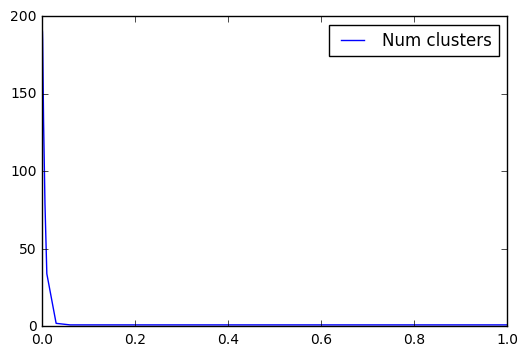

In [38]:
N=200
prob=[0,0.0001,0.0003,0.0006,0.001,0.003,0.006,0.01,0.03,0.06,0.1,0.3,0.6,1.]
tams=[]
for p in prob:
    print("==========================\nprob="+str(p))
    text, tam = aleatorio3(N,p)
    tams.append(tam)
    #print (text)
print("==========================\nNum clusters")
plt.plot(prob, tams, label="Num clusters")
plt.legend()
plt.show()

prob=0
Grafo con 200 componentes
prob=0.0001
Grafo con 200 componentes
prob=0.0003
Grafo con 193 componentes
prob=0.0006
Grafo con 183 componentes
prob=0.001
Grafo con 172 componentes
prob=0.003
Grafo con 147 componentes
prob=0.006
Grafo con 82 componentes
prob=0.01
Grafo con 36 componentes
prob=0.03
Grafo con 1 componentes
prob=0.06
Grafo con 1 componentes
prob=0.1
Grafo con 1 componentes
prob=0.3
Grafo con 1 componentes
prob=0.6
Grafo con 1 componentes
prob=1.0
Grafo con 1 componentes
Num clusters


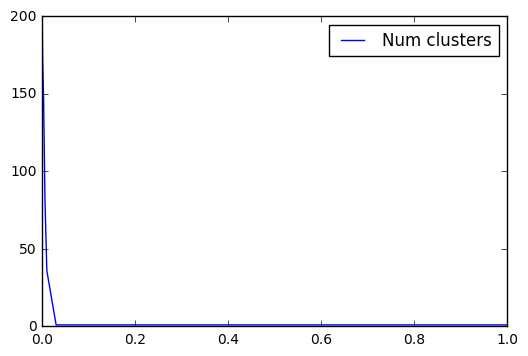

In [39]:
N=200
prob=[0,0.0001,0.0003,0.0006,0.001,0.003,0.006,0.01,0.03,0.06,0.1,0.3,0.6,1.]
tams=[]
for p in prob:
    print("==========================\nprob="+str(p))
    res, num = componentes_conexas(grafo_aleatorio(N, p))
    tams.append(num)
    print("Grafo con " + str(num) + " componentes")
print("==========================\nNum clusters")
plt.plot(prob, tams, label="Num clusters")
plt.legend()
plt.show()

prob=0
Componente 0 tiene 1 nodos
Componente 1 tiene 1 nodos
Componente 2 tiene 1 nodos
Componente 3 tiene 1 nodos
Componente 4 tiene 1 nodos
Componente 5 tiene 1 nodos
Componente 6 tiene 1 nodos
Componente 7 tiene 1 nodos
Componente 8 tiene 1 nodos
Componente 9 tiene 1 nodos
Componente 10 tiene 1 nodos
Componente 11 tiene 1 nodos
Componente 12 tiene 1 nodos
Componente 13 tiene 1 nodos
Componente 14 tiene 1 nodos
Componente 15 tiene 1 nodos
Componente 16 tiene 1 nodos
Componente 17 tiene 1 nodos
Componente 18 tiene 1 nodos
Componente 19 tiene 1 nodos
Componente 20 tiene 1 nodos
Componente 21 tiene 1 nodos
Componente 22 tiene 1 nodos
Componente 23 tiene 1 nodos
Componente 24 tiene 1 nodos
Componente 25 tiene 1 nodos
Componente 26 tiene 1 nodos
Componente 27 tiene 1 nodos
Componente 28 tiene 1 nodos
Componente 29 tiene 1 nodos
Componente 30 tiene 1 nodos
Componente 31 tiene 1 nodos
Componente 32 tiene 1 nodos
Componente 33 tiene 1 nodos
Componente 34 tiene 1 nodos
Componente 35 tiene 1 n

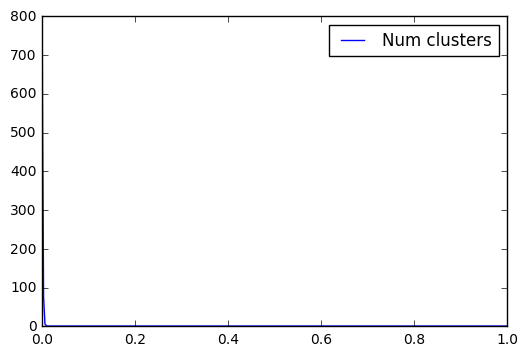

In [40]:
N=800
prob=[0,0.0001,0.0003,0.0006,0.001,0.003,0.006,0.01,0.03,0.06,0.1,0.3,0.6,1.]
tams=[]
for p in prob:
    print("==========================\nprob="+str(p))
    text, tam = aleatorio3(N,p)
    tams.append(tam)
    print (text)
print("==========================\nNum clusters")
plt.plot(prob, tams, label="Num clusters")
plt.legend()
plt.show()

prob=0
Grafo con 800 componentes
prob=0.0001
Grafo con 777 componentes
prob=0.0003
Grafo con 704 componentes
prob=0.0006
Grafo con 620 componentes
prob=0.001
Grafo con 491 componentes
prob=0.003
Grafo con 74 componentes
prob=0.006
Grafo con 10 componentes
prob=0.01
Grafo con 1 componentes
prob=0.03
Grafo con 1 componentes
prob=0.06
Grafo con 1 componentes
prob=0.1
Grafo con 1 componentes
prob=0.3
Grafo con 1 componentes
prob=0.6
Grafo con 1 componentes
prob=1.0
Grafo con 1 componentes
Num clusters


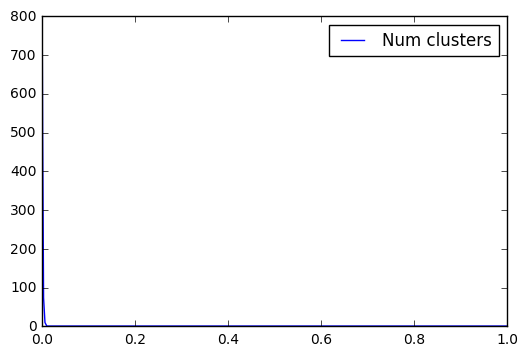

In [41]:
N=800
prob=[0,0.0001,0.0003,0.0006,0.001,0.003,0.006,0.01,0.03,0.06,0.1,0.3,0.6,1.]
tams=[]
for p in prob:
    print("==========================\nprob="+str(p))
    res, num = componentes_conexas(grafo_aleatorio(N, p))
    tams.append(num)
    print("Grafo con " + str(num) + " componentes")
print("==========================\nNum clusters")
plt.plot(prob, tams, label="Num clusters")
plt.legend()
plt.show()

### Impresion en escala logaritmica

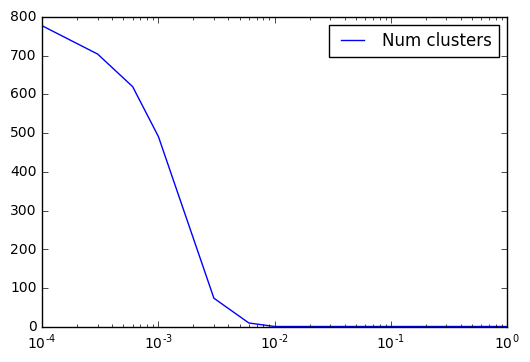

In [42]:
plt.plot(prob, tams, label="Num clusters")
plt.legend()
plt.semilogx()
plt.show()

#### ¿Para qué probabilidades p se producen cambios fase en el comportamiento de las componentes conexas del grafo?
La probabilidad P para la cual se produce el cambio es un valor muy pequeño, alrededor de un 1% de posibles ramas. Por debajo de este valor el numero de componentes va aumentando gradualmente segun se reduce el valor, por encima solo hay una componente. También he observado que en esta fase de p<1% hay una tendencia a que exista una gran componente con muchos nodos y muchas componentes formadas por un solo nodo. Es decir el resultado de conseguir una sola componente no se consigue por la agregación de componentes similares (cada vez menos y mas grandes), si no que se forma un gran componente que con cada subida de probabilidad absorbe mas nodos